This notebook analyses the results of the model building and analysis performed in MLanalysis.ipynb on the feature discretization test datasets created in feature_discretization.ipynb.
___
___

imports dependencies

In [95]:
import pickle
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from matplotlib import patches
import seaborn as sns
import numpy as np

reads in data

In [96]:
with open('../Dataset/Testgroup_results.pkl', 'rb') as f:
    df_dict = pickle.load(f)

for group_name, values in df_dict.items():
    print(f"{group_name}: {list(values.keys())}")

TestGroup_1a_df: ['df', 'x', 'y', 'X_train', 'X_test', 'y_train', 'y_test', 'dt_model', 'dt_y_pred', 'dt_y_proba', 'dt_accuracy', 'dt_auc', 'dt_complexity_metrics', 'rf_model', 'rf_y_pred', 'rf_y_proba', 'rf_accuracy', 'rf_auc', 'rf_complexity_metrics', 'svm_model', 'svm_y_pred', 'svm_y_proba', 'svm_accuracy', 'svm_auc', 'svm_complexity_metrics']
TestGroup_1b_df: ['df', 'x', 'y', 'X_train', 'X_test', 'y_train', 'y_test', 'dt_model', 'dt_y_pred', 'dt_y_proba', 'dt_accuracy', 'dt_auc', 'dt_complexity_metrics', 'rf_model', 'rf_y_pred', 'rf_y_proba', 'rf_accuracy', 'rf_auc', 'rf_complexity_metrics', 'svm_model', 'svm_y_pred', 'svm_y_proba', 'svm_accuracy', 'svm_auc', 'svm_complexity_metrics']
TestGroup_1c_df: ['df', 'x', 'y', 'X_train', 'X_test', 'y_train', 'y_test', 'dt_model', 'dt_y_pred', 'dt_y_proba', 'dt_accuracy', 'dt_auc', 'dt_complexity_metrics', 'rf_model', 'rf_y_pred', 'rf_y_proba', 'rf_accuracy', 'rf_auc', 'rf_complexity_metrics', 'svm_model', 'svm_y_pred', 'svm_y_proba', 'svm_a

___
Part 1: collect performance metrics for comparison into data frame
___

In [97]:
group_names = list(df_dict.keys())

dt_accuracy = []
rf_accuracy = []
svm_accuracy = []

dt_auc = []
rf_auc = []
svm_auc = []


svm_complexity = []
metrics_df = pd.DataFrame()


for group_name, values in df_dict.items():

    # Combines dfs stored as dict values for complexity into single df
    ## as a single row
    row_df = pd.concat([values['dt_complexity_metrics'],     
                        values['rf_complexity_metrics']],
                        axis=1)
    
    # appends to global metrics df as row
    metrics_df = pd.concat([metrics_df,
                            row_df],
                            axis = 0)
    
    # appends to the svc complexity array that is added to df at end
    svm_complexity.append(values['svm_complexity_metrics'])
    
    # appends other array to be added in a similar fashion
    dt_accuracy.append(values['dt_accuracy'])
    rf_accuracy.append(values['rf_accuracy'])
    svm_accuracy.append(values['svm_accuracy'])

    dt_auc.append(values['dt_auc'])
    rf_auc.append(values['rf_auc'])
    svm_auc.append(values['svm_auc'])

# appends loop-derived attributes to df
metrics_df['support_vectors'] = svm_complexity
metrics_df['dt_accuracy'] = dt_accuracy
metrics_df['rf_accuracy'] = rf_accuracy
metrics_df['svm_accuracy'] = svm_accuracy
metrics_df['dt_auc'] = dt_auc
metrics_df['rf_auc'] = rf_auc
metrics_df['svm_auc'] = svm_auc

metrics_df = metrics_df.rename(columns={'tree_depth': 'dt_tree_depth'})
metrics_df = metrics_df.rename(columns={'num_nodes': 'dt_num_nodes'})
metrics_df = metrics_df.rename(columns={'avg_tree_depth': 'rf_avg_tree_depth'})
metrics_df = metrics_df.rename(columns={'avg_num_nodes': 'rf_avg_num_nodes'})
metrics_df = metrics_df.rename(columns={'support_vectors': 'svm_support_vectors'})


#names rows rather than assigning test datasets to an attribute
metrics_df.index = group_names


# removes vars with constant var
remove = metrics_df.columns[metrics_df.nunique()==1]
metrics_df.drop(remove, axis = 1, inplace= True)

metrics_df.to_csv("../Dataset/test_performanceResults.csv")

metrics_df

,dt_tree_depth,dt_num_nodes,rf_avg_tree_depth,rf_avg_num_nodes,svm_support_vectors,dt_accuracy,rf_accuracy,svm_accuracy,dt_auc,rf_auc,svm_auc
TestGroup_1a_df,33,17299,31.73,15270.56,22619,0.897459,0.922762,0.903491,0.923890,0.979812,0.973553
TestGroup_1b_df,30,8585,29.69,8674.02,9345,0.949394,0.967030,0.960844,0.956512,0.993151,0.991239
TestGroup_1c_df,29,16045,28.32,13710.38,24323,0.882789,0.896795,0.879569,0.930305,0.967944,0.957275
TestGroup_2a_df,25,9691,23.95,8291.80,20351,0.893319,0.897971,0.893984,0.953955,0.971462,0.970741
TestGroup_2b_df,28,9247,27.70,8456.86,8634,0.955477,0.965752,0.962991,0.962865,0.990414,0.990437
TestGroup_2c_df,30,16467,28.17,14066.76,22337,0.887696,0.900884,0.889281,0.933157,0.968464,0.964672
control_df,33,3807,30.27,4343.30,50041,0.964780,0.977304,0.735368,0.968935,0.994932,0.894720


**experimental groups**:
* 1_a variance optimized bin size; correlation optimized technique ensemble
* 1_b variance optimized bin size; mutual information optimized technique ensemble
* 1_c randomized bin sizes and ensemple
* 2_a entropy optimized bin size; correlation optimized technique ensemble
* 2_b entropy optimized bin size; mutual information optimized technique ensemble
* 2_c randomized bin sizes and ensemple (equals 1_c)
* control: original continuous predictors

2b shows the best overall performance. It has competative complexity scores with the lowest number of support vectors while matching or beating the scores of the control. This optimization combines entropy and mutual information. 

___
Part 2: Visualization of the results
___

In [98]:
test_datasets = metrics_df.index
print(test_datasets)
# Separates columns into different dfs by measure
complexity_df = metrics_df.iloc[:,0:5]
complexity_df.head()
accuracy_df = metrics_df[metrics_df.columns.difference(complexity_df.columns)]
accuracy_df


Index(['TestGroup_1a_df', 'TestGroup_1b_df', 'TestGroup_1c_df',
       'TestGroup_2a_df', 'TestGroup_2b_df', 'TestGroup_2c_df', 'control_df'],
      dtype='object')


,dt_accuracy,dt_auc,rf_accuracy,rf_auc,svm_accuracy,svm_auc
TestGroup_1a_df,0.897459,0.923890,0.922762,0.979812,0.903491,0.973553
TestGroup_1b_df,0.949394,0.956512,0.967030,0.993151,0.960844,0.991239
TestGroup_1c_df,0.882789,0.930305,0.896795,0.967944,0.879569,0.957275
TestGroup_2a_df,0.893319,0.953955,0.897971,0.971462,0.893984,0.970741
TestGroup_2b_df,0.955477,0.962865,0.965752,0.990414,0.962991,0.990437
TestGroup_2c_df,0.887696,0.933157,0.900884,0.968464,0.889281,0.964672
control_df,0.964780,0.968935,0.977304,0.994932,0.735368,0.894720


In [99]:
complexity_df

,dt_tree_depth,dt_num_nodes,rf_avg_tree_depth,rf_avg_num_nodes,svm_support_vectors
TestGroup_1a_df,33,17299,31.73,15270.56,22619
TestGroup_1b_df,30,8585,29.69,8674.02,9345
TestGroup_1c_df,29,16045,28.32,13710.38,24323
TestGroup_2a_df,25,9691,23.95,8291.80,20351
TestGroup_2b_df,28,9247,27.70,8456.86,8634
TestGroup_2c_df,30,16467,28.17,14066.76,22337
control_df,33,3807,30.27,4343.30,50041


#### I didn't like the manipulations required for the bar graphs below so I did a "top view" bar graph at the bottom

/tmp/ipykernel_13791/3506702110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accuracy_df['Dataset'] = test_datasets


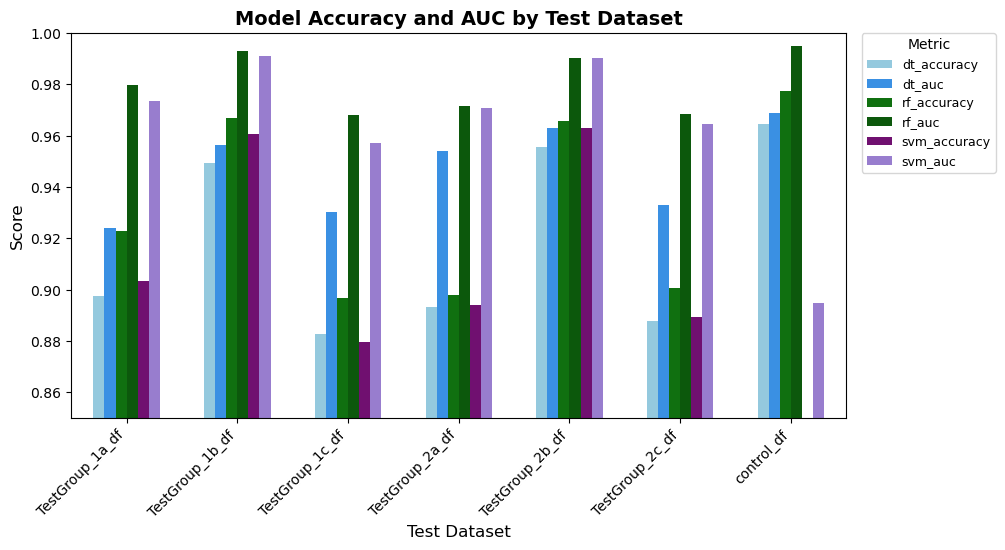

In [100]:
# appends test group names to accuracy df for long form transformation
accuracy_df['Dataset'] = test_datasets

# long form df
accuracy_auc_long = pd.melt(accuracy_df,
                           id_vars='Dataset', var_name='Metric', value_name='Score')


plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=accuracy_auc_long,
    x='Dataset',
    y='Score',
    hue='Metric',
    palette={
        'dt_accuracy': 'skyblue',
        'rf_accuracy': 'green',
        'svm_accuracy': 'purple',
        'dt_auc': 'dodgerblue',
        'rf_auc': 'darkgreen',
        'svm_auc': 'mediumpurple'
    },
    width=0.6
)

#labels
plt.title('Model Accuracy and AUC by Test Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Test Dataset', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.85, 1.0) # not ideal 

# legend
plt.legend(
    title='Metric',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=9,
    title_fontsize=10
)

plt.savefig("../IMGs/accuracy_auc_barplot_clean.png", dpi=300, bbox_inches='tight')
plt.show()


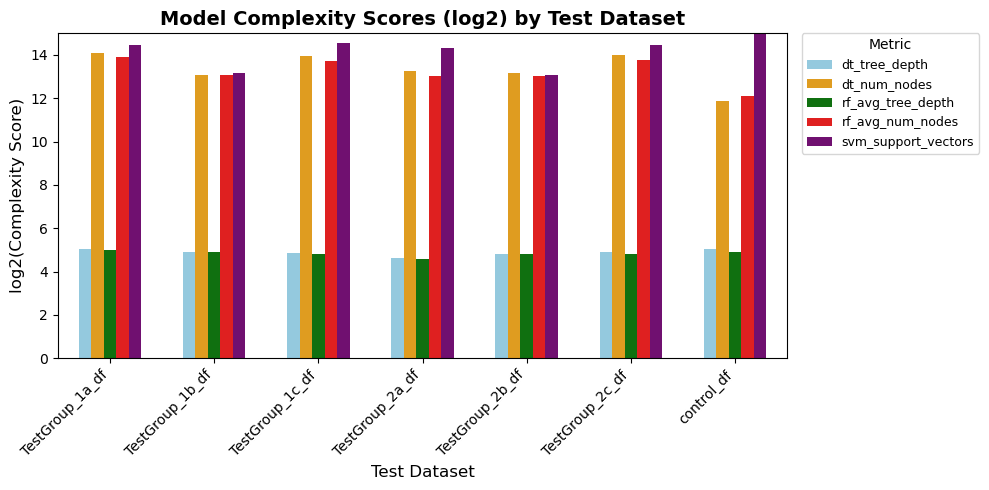

In [101]:
# appends test group names to accuracy df for long form transformation
complexity_df['Dataset'] = test_datasets
# creates long form data frame for grouping
complexity_long = pd.melt(complexity_df, id_vars='Dataset', var_name='Metric', value_name='Score')


# log transformed to make disparites less stark
complexity_long['Log2_Score'] = np.log2(complexity_long['Score'])

# color palette for complexity measures
model_palette_complexity = {
    'dt_tree_depth': 'skyblue',
    'dt_num_nodes': 'orange', 
    'rf_avg_tree_depth': 'green',
    'rf_avg_num_nodes': 'red',
    'svm_support_vectors': 'purple'
}

# bar plot
plt.figure(figsize=(10, 5))
barplot_complexity = sns.barplot(
    data=complexity_long,
    x='Dataset',
    y='Log2_Score',
    hue='Metric',
    palette=model_palette_complexity,
    width=0.6
)

# style
plt.title('Model Complexity Scores (log2) by Test Dataset', fontsize=14, fontweight='bold')
plt.ylabel('log2(Complexity Score)', fontsize=12)
plt.xlabel('Test Dataset', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 15)  # Adjust depending on the log2 range of your data

# move legend outside
plt.legend(
    title='Metric',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.savefig("../IMGs/complexitybar_log2.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_13791/812418220.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_complexity = cm.get_cmap("Oranges")  # low values = light, high = dark
/tmp/ipykernel_13791/812418220.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_accuracy = cm.get_cmap("YlGn")       # low values = light, high = dark


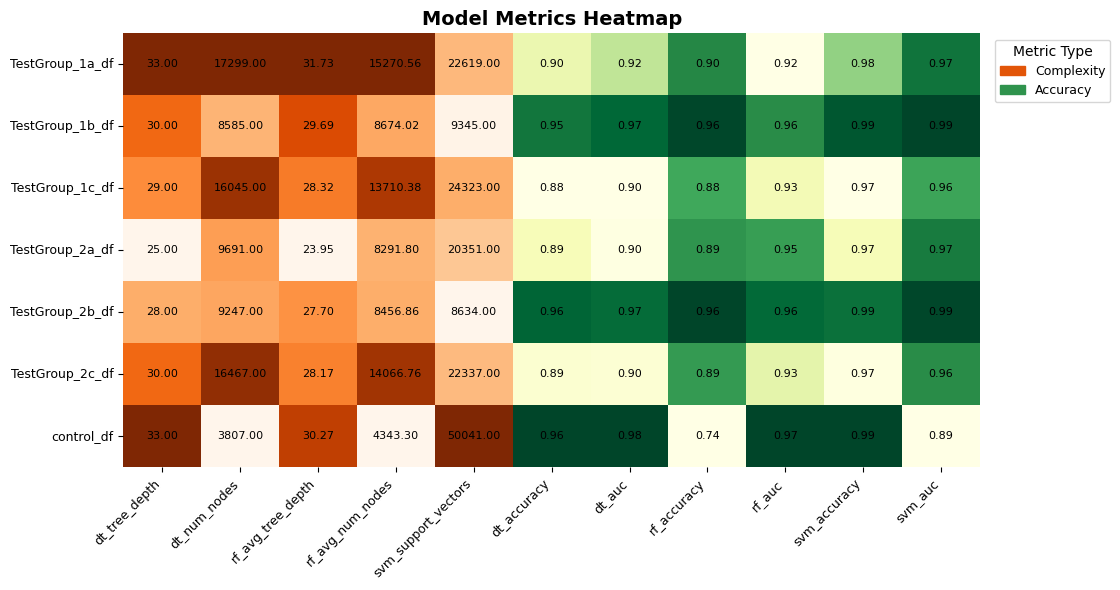

In [104]:
# copy of object at new address
metrics_df2 = metrics_df.copy()

#updates metrics rownames
metrics_df2.index = metrics_df2.index.to_series().apply(lambda x: re.sub(r"(TestGroup_)?(.+?)(_df)?$", r"\2", x))


# selects colors to see font consistently
cmap_complexity = cm.get_cmap("Oranges")  # low values = light, high = dark
cmap_accuracy = cm.get_cmap("YlGn")       # low values = light, high = dark

# adjust size of plot to avoid squishing
fig_width = max(10, 0.8 * metrics_df2.shape[1]) 

# plot
fig, ax = plt.subplots(figsize=(fig_width, 6))


complexity_cols = complexity_df.columns

# assigns appropriate color map per sectioned heatmap
col_colors = [cmap_complexity if col in complexity_cols else cmap_accuracy for col in metrics_df2.columns]

# heatmap object
sns.heatmap(
    full_data,
    annot=False,
    fmt='.2f',
    cmap=None,
    cbar=False,
    linewidths=0.5,
    linecolor='lightgray',
    square=False,
    xticklabels=True,
    yticklabels=True,
    ax=ax
)

# apply column-specific colormaps with annotation
for i, col in enumerate(metrics_df2.columns):
    values = metrics_df2[col].values

    #creates color saturation vector
    normalized = (values - values.min()) / (values.max() - values.min())
    colors = col_colors[i](normalized)

    #creates cell and applies colors nimeric values to heatmap 
    for j in range(len(values)):
        val = values[j]
        ax.add_patch(
            patches.Rectangle((i, j), 1, 1, fill=True, color=colors[j], lw=0)
        )
        ax.text(
            i + 0.5, j + 0.5,
            f"{val:.2f}",
            ha='center', va='center',
            color='black', fontsize=8
        )

# makes labels fit
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
ax.set_title("Model Metrics Heatmap", fontsize=14, weight='bold')
plt.tight_layout()

# legend
legend_patches = [
    patches.Patch(color=cmap_complexity(0.7), label='Complexity'),
    patches.Patch(color=cmap_accuracy(0.7), label='Accuracy')
]
ax.legend(
    handles=legend_patches,
    loc='upper left',
    bbox_to_anchor=(1.01, 1),
    borderaxespad=0.5,
    fontsize=9,
    title='Metric Type',
    title_fontsize=10
)

plt.savefig("../IMGs/model_metrics_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


In [66]:
print(complexity_df.dtypes)

dt_tree_depth            int64
dt_num_nodes             int64
rf_avg_tree_depth      float64
rf_avg_num_nodes       float64
svm_support_vectors      int64
Dataset                 object
dtype: object
